In [1]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.layers.advanced_activations import PReLU, LeakyReLU
from keras.regularizers import l2
from keras.utils import np_utils
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
X_train = np.loadtxt('../dataset/face/X_train.txt', delimiter=',').reshape((31242, 48, 48, 1))
Y_train = np.loadtxt('../dataset/face/Y_train.txt', delimiter=',')
X_test = np.loadtxt('../dataset/face/X_test.txt', delimiter=',').reshape((3589, 48, 48, 1))
Y_test = np.loadtxt('../dataset/face/Y_test.txt', delimiter=',')

In [3]:
Y_train.shape

(31242, 7)

In [4]:
X_train2 = np.loadtxt('../dataset/face/X_train2.txt', delimiter=',').reshape((50372, 48, 48, 1))
Y_train2 = np.loadtxt('../dataset/face/Y_train2.txt', delimiter=',')

In [6]:
X_train2.shape

(50372, 48, 48, 1)

### Print Images

In [11]:
def print_img(row, col, target, idx):
    fig = plt.figure(figsize=(col*2.5, row*2.5))
    
    for i in range(len(idx)):
        plt.subplot(row, col, (i+1))
        plt.imshow(target[idx[i]].reshape((48, 48)), cmap='gray')
        plt.grid(False); plt.xticks([]); plt.yticks([]);
    
    plt.show()

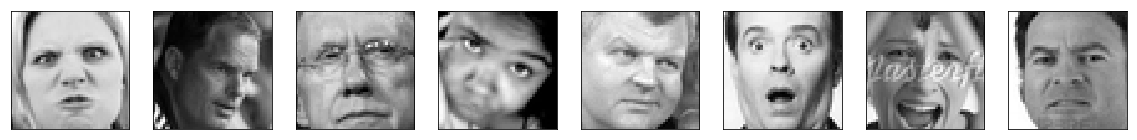

In [23]:
print_img(row=1, col=8, target=X_train2, idx=[20,21,22,23,24,25,26,27])

# Activation Function Test

### 1. activation = sigmoid

In [9]:
np.random.seed(10)

model1 = Sequential()

model1.add(Conv2D(64, (5, 5), activation='sigmoid', input_shape=(48, 48, 1), padding='same', kernel_regularizer=l2(0.001)))
model1.add(Conv2D(64, (5, 5), activation='sigmoid', padding='same'))
model1.add(MaxPooling2D())
model1.add(Dropout(0.5))

model1.add(Conv2D(128, (5, 5), activation='sigmoid', padding='same', kernel_regularizer=l2(0.001)))
model1.add(Conv2D(128, (5, 5), activation='sigmoid', padding='same', kernel_regularizer=l2(0.001)))
model1.add(MaxPooling2D())
model1.add(Dropout(0.5))

model1.add(Conv2D(256, (5, 5), activation='sigmoid', padding='same', kernel_regularizer=l2(0.001)))
model1.add(Conv2D(256, (5, 5), activation='sigmoid', padding='same', kernel_regularizer=l2(0.001)))
model1.add(MaxPooling2D())
model1.add(Dropout(0.5))

model1.add(Flatten())
model1.add(Dense(512, activation='sigmoid', kernel_regularizer=l2(0.001)))
model1.add(Dropout(0.5))
model1.add(Dense(7, activation='softmax'))

opt = optimizers.Adadelta()
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=200, batch_size=100, validation_data=(X_test, Y_test), verbose=2)

Train on 31242 samples, validate on 3589 samples
Epoch 1/200
66s - loss: 3.0517 - acc: 0.2123 - val_loss: 2.4848 - val_acc: 0.2449
Epoch 2/200
64s - loss: 2.2782 - acc: 0.2285 - val_loss: 2.0668 - val_acc: 0.2449
Epoch 3/200
64s - loss: 2.0334 - acc: 0.2292 - val_loss: 1.9500 - val_acc: 0.2449
Epoch 4/200


KeyboardInterrupt: 

### 2. activation = relu

In [12]:
np.random.seed(10)

model2 = Sequential()

model2.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48, 48, 1), padding='same', kernel_regularizer=l2(0.001)))
model2.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model2.add(MaxPooling2D())
model2.add(Dropout(0.5))

model2.add(Conv2D(128, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model2.add(Conv2D(128, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model2.add(MaxPooling2D())
model2.add(Dropout(0.5))

model2.add(Conv2D(256, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model2.add(Conv2D(256, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model2.add(MaxPooling2D())
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model2.add(Dropout(0.5))
model2.add(Dense(7, activation='softmax'))

opt = optimizers.Adadelta()
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
%%time
hist2 = model2.fit(X_train, Y_train, epochs=200, batch_size=100, validation_data=(X_test, Y_test), verbose=2)

Train on 31242 samples, validate on 3589 samples
Epoch 1/200
64s - loss: 2.8767 - acc: 0.2291 - val_loss: 2.3587 - val_acc: 0.2449
Epoch 2/200
64s - loss: 2.1666 - acc: 0.2537 - val_loss: 1.8751 - val_acc: 0.3405
Epoch 3/200
64s - loss: 1.8274 - acc: 0.3502 - val_loss: 1.7602 - val_acc: 0.3759
Epoch 4/200
64s - loss: 1.6465 - acc: 0.4166 - val_loss: 1.6035 - val_acc: 0.4079
Epoch 5/200
64s - loss: 1.5377 - acc: 0.4644 - val_loss: 1.4921 - val_acc: 0.4759
Epoch 6/200
64s - loss: 1.4670 - acc: 0.4967 - val_loss: 1.4658 - val_acc: 0.5018
Epoch 7/200
64s - loss: 1.4204 - acc: 0.5206 - val_loss: 1.5312 - val_acc: 0.4787
Epoch 8/200
64s - loss: 1.3895 - acc: 0.5390 - val_loss: 1.3934 - val_acc: 0.5316
Epoch 9/200
64s - loss: 1.3596 - acc: 0.5565 - val_loss: 1.4637 - val_acc: 0.5052
Epoch 10/200
64s - loss: 1.3275 - acc: 0.5730 - val_loss: 1.3696 - val_acc: 0.5511
Epoch 11/200
64s - loss: 1.3092 - acc: 0.5841 - val_loss: 1.3263 - val_acc: 0.5717
Epoch 12/200
64s - loss: 1.2864 - acc: 0.5982 -

64s - loss: 0.9339 - acc: 0.8433 - val_loss: 1.6992 - val_acc: 0.6464
Epoch 101/200
64s - loss: 0.9320 - acc: 0.8414 - val_loss: 1.6741 - val_acc: 0.6565
Epoch 102/200
64s - loss: 0.9364 - acc: 0.8428 - val_loss: 1.6934 - val_acc: 0.6556
Epoch 103/200
64s - loss: 0.9311 - acc: 0.8449 - val_loss: 1.5708 - val_acc: 0.6576
Epoch 104/200
64s - loss: 0.9270 - acc: 0.8472 - val_loss: 1.7751 - val_acc: 0.6601
Epoch 105/200
64s - loss: 0.9280 - acc: 0.8440 - val_loss: 1.6281 - val_acc: 0.6768
Epoch 106/200
64s - loss: 0.9285 - acc: 0.8447 - val_loss: 1.7930 - val_acc: 0.6551
Epoch 107/200
64s - loss: 0.9309 - acc: 0.8460 - val_loss: 1.7198 - val_acc: 0.6562
Epoch 108/200
64s - loss: 0.9329 - acc: 0.8442 - val_loss: 1.6828 - val_acc: 0.6690
Epoch 109/200
64s - loss: 0.9233 - acc: 0.8464 - val_loss: 1.5884 - val_acc: 0.6595
Epoch 110/200
64s - loss: 0.9267 - acc: 0.8477 - val_loss: 1.7199 - val_acc: 0.6570
Epoch 111/200
64s - loss: 0.9275 - acc: 0.8479 - val_loss: 1.6972 - val_acc: 0.6631
Epoch 

63s - loss: 0.8903 - acc: 0.8663 - val_loss: 1.8417 - val_acc: 0.6620
Epoch 199/200
63s - loss: 0.9064 - acc: 0.8638 - val_loss: 1.8456 - val_acc: 0.6612
Epoch 200/200
63s - loss: 0.8927 - acc: 0.8682 - val_loss: 1.6856 - val_acc: 0.6570
CPU times: user 2h 20min 30s, sys: 16min 35s, total: 2h 37min 6s
Wall time: 3h 33min 47s


In [15]:
model2.save("../models/face_model2.hdf5")

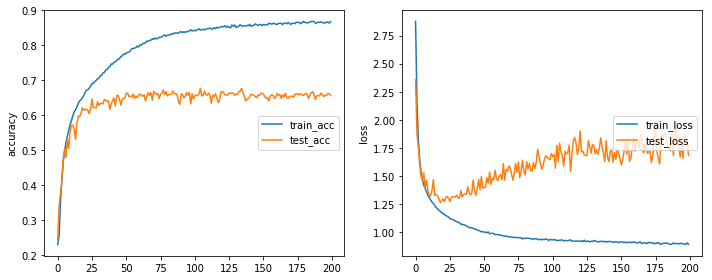

In [14]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(hist2.history["acc"], label='train_acc')
ax1.plot(hist2.history["val_acc"], label='test_acc')
ax1.set_ylabel('accuracy')
ax1.legend(loc='center right')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(hist2.history["loss"], label='train_loss')
ax2.plot(hist2.history["val_loss"], label='test_loss')
ax2.set_ylabel('loss')
ax2.legend(loc='center right')

fig.tight_layout()
plt.show()

In [16]:
proba_pred = model2.predict(X_test)
Y_pred = model2.predict_classes(X_test)

3584/3589 [============================>.] - ETA: 0s

### 3. activation =PReLU

In [6]:
np.random.seed(10)

model3 = Sequential()

model3.add(Conv2D(64, (5, 5), input_shape=(48, 48, 1), padding='same', kernel_regularizer=l2(0.001)))
model3.add(PReLU())
model3.add(Conv2D(64, (5, 5), padding='same', kernel_regularizer=l2(0.001)))
model3.add(PReLU())
model3.add(MaxPooling2D())
model3.add(Dropout(0.5))

model3.add(Conv2D(128, (5, 5), padding='same', kernel_regularizer=l2(0.001)))
model3.add(PReLU())
model3.add(Conv2D(128, (5, 5), padding='same', kernel_regularizer=l2(0.001)))
model3.add(PReLU())
model3.add(MaxPooling2D())
model3.add(Dropout(0.5))

model3.add(Conv2D(256, (5, 5), padding='same', kernel_regularizer=l2(0.001)))
model3.add(PReLU())
model3.add(Conv2D(256, (5, 5), padding='same', kernel_regularizer=l2(0.001)))
model3.add(PReLU())
model3.add(MaxPooling2D())
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(512, kernel_regularizer=l2(0.001)))
model3.add(PReLU())
model3.add(Dropout(0.5))
model3.add(Dense(7, activation='softmax'))

opt = optimizers.Adadelta()
model3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [7]:
%%time
hist3 = model3.fit(X_train, Y_train, epochs=200, batch_size=100, validation_data=(X_test, Y_test), verbose=2)

Train on 31242 samples, validate on 3589 samples
Epoch 1/200
80s - loss: 2.9154 - acc: 0.2292 - val_loss: 2.3799 - val_acc: 0.2449
Epoch 2/200
76s - loss: 2.1828 - acc: 0.2490 - val_loss: 1.9730 - val_acc: 0.3084
Epoch 3/200
76s - loss: 1.8428 - acc: 0.3498 - val_loss: 1.6941 - val_acc: 0.4060
Epoch 4/200
76s - loss: 1.6621 - acc: 0.4097 - val_loss: 1.5671 - val_acc: 0.4400
Epoch 5/200
76s - loss: 1.5541 - acc: 0.4567 - val_loss: 1.5672 - val_acc: 0.4441
Epoch 6/200
76s - loss: 1.4849 - acc: 0.4918 - val_loss: 1.5223 - val_acc: 0.4829
Epoch 7/200
76s - loss: 1.4414 - acc: 0.5194 - val_loss: 1.5286 - val_acc: 0.4804
Epoch 8/200
76s - loss: 1.4052 - acc: 0.5361 - val_loss: 1.4407 - val_acc: 0.5255
Epoch 9/200
76s - loss: 1.3766 - acc: 0.5550 - val_loss: 1.4094 - val_acc: 0.5252
Epoch 10/200
76s - loss: 1.3514 - acc: 0.5735 - val_loss: 1.3916 - val_acc: 0.5430
Epoch 11/200
76s - loss: 1.3337 - acc: 0.5815 - val_loss: 1.3522 - val_acc: 0.5648
Epoch 12/200
76s - loss: 1.3102 - acc: 0.5944 -

76s - loss: 0.9252 - acc: 0.8591 - val_loss: 1.7408 - val_acc: 0.6464
Epoch 101/200
76s - loss: 0.9368 - acc: 0.8568 - val_loss: 1.8860 - val_acc: 0.6395
Epoch 102/200
76s - loss: 0.9247 - acc: 0.8604 - val_loss: 1.7967 - val_acc: 0.6372
Epoch 103/200
76s - loss: 0.9277 - acc: 0.8600 - val_loss: 1.7814 - val_acc: 0.6539
Epoch 104/200
76s - loss: 0.9248 - acc: 0.8622 - val_loss: 1.8567 - val_acc: 0.6517
Epoch 105/200
76s - loss: 0.9196 - acc: 0.8648 - val_loss: 1.7519 - val_acc: 0.6523
Epoch 106/200
76s - loss: 0.9225 - acc: 0.8635 - val_loss: 1.8218 - val_acc: 0.6634
Epoch 107/200
76s - loss: 0.9206 - acc: 0.8629 - val_loss: 1.7903 - val_acc: 0.6447
Epoch 108/200
76s - loss: 0.9134 - acc: 0.8682 - val_loss: 1.7968 - val_acc: 0.6492
Epoch 109/200
76s - loss: 0.9185 - acc: 0.8654 - val_loss: 1.7197 - val_acc: 0.6470
Epoch 110/200
76s - loss: 0.9141 - acc: 0.8671 - val_loss: 1.9000 - val_acc: 0.6450
Epoch 111/200
76s - loss: 0.9120 - acc: 0.8681 - val_loss: 1.7846 - val_acc: 0.6514
Epoch 

76s - loss: 0.8279 - acc: 0.8945 - val_loss: 1.9286 - val_acc: 0.6498
Epoch 199/200
76s - loss: 0.8255 - acc: 0.8944 - val_loss: 1.9740 - val_acc: 0.6406
Epoch 200/200
76s - loss: 0.8239 - acc: 0.8968 - val_loss: 1.8612 - val_acc: 0.6367
CPU times: user 2h 43min 38s, sys: 16min 54s, total: 3h 32s
Wall time: 4h 15min 29s


In [8]:
model3.save("../models/face_model3.hdf5")

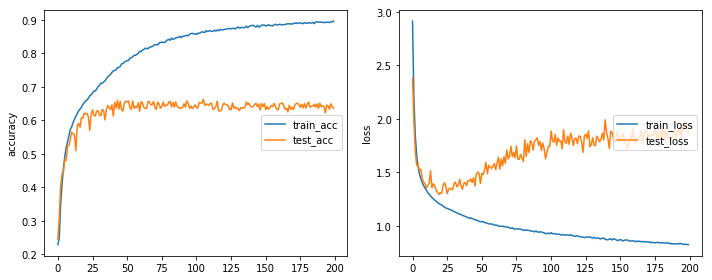

In [9]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(hist3.history["acc"], label='train_acc')
ax1.plot(hist3.history["val_acc"], label='test_acc')
ax1.set_ylabel('accuracy')
ax1.legend(loc='center right')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(hist3.history["loss"], label='train_loss')
ax2.plot(hist3.history["val_loss"], label='test_loss')
ax2.set_ylabel('loss')
ax2.legend(loc='center right')

fig.tight_layout()
plt.show()

### 4. activation = relu (w/ balanced training data)

In [26]:
np.random.seed(10)

model4 = Sequential()

model4.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48, 48, 1), padding='same', kernel_regularizer=l2(0.001)))
#model4.add(Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model4.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model4.add(MaxPooling2D())
model4.add(Dropout(0.5))

model4.add(Conv2D(128, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model4.add(Conv2D(128, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model4.add(MaxPooling2D())
model4.add(Dropout(0.5))

model4.add(Conv2D(256, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model4.add(Conv2D(256, (5, 5), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model4.add(MaxPooling2D())
model4.add(Dropout(0.5))

model4.add(Flatten())
model4.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model4.add(Dropout(0.5))
model4.add(Dense(7, activation='softmax'))

opt = optimizers.Adadelta()
model4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
%%time
hist4 = model4.fit(X_train2, Y_train2, epochs=100, batch_size=100, validation_data=(X_test, Y_test), verbose=2)

Train on 50372 samples, validate on 3589 samples
Epoch 1/100
105s - loss: 1.7009 - acc: 0.3895 - val_loss: 1.6121 - val_acc: 0.4193
Epoch 2/100
104s - loss: 1.5655 - acc: 0.4520 - val_loss: 1.4267 - val_acc: 0.5085
Epoch 3/100
104s - loss: 1.4876 - acc: 0.4958 - val_loss: 1.4355 - val_acc: 0.5121
Epoch 4/100
104s - loss: 1.4319 - acc: 0.5221 - val_loss: 1.5188 - val_acc: 0.4887
Epoch 5/100
104s - loss: 1.3945 - acc: 0.5443 - val_loss: 1.3708 - val_acc: 0.5536
Epoch 6/100
104s - loss: 1.3690 - acc: 0.5585 - val_loss: 1.3276 - val_acc: 0.5754
Epoch 7/100
104s - loss: 1.3383 - acc: 0.5748 - val_loss: 1.3376 - val_acc: 0.5790
Epoch 8/100
104s - loss: 1.3174 - acc: 0.5854 - val_loss: 1.3057 - val_acc: 0.5846
Epoch 9/100
104s - loss: 1.3015 - acc: 0.5951 - val_loss: 1.2885 - val_acc: 0.5979
Epoch 10/100
104s - loss: 1.2834 - acc: 0.6036 - val_loss: 1.2631 - val_acc: 0.6071
Epoch 11/100
104s - loss: 1.2680 - acc: 0.6094 - val_loss: 1.2579 - val_acc: 0.6071
Epoch 12/100
104s - loss: 1.2544 - a

In [15]:
model4.save("../models/face_model4.hdf5")

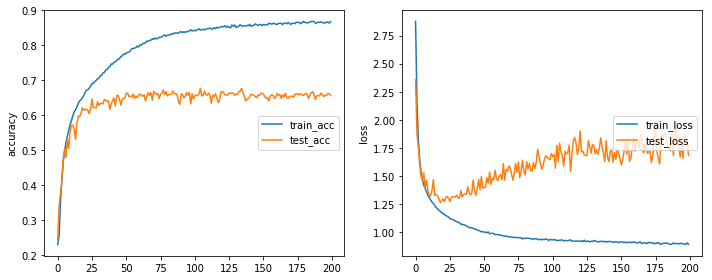

In [14]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(hist4.history["acc"], label='train_acc')
ax1.plot(hist4.history["val_acc"], label='test_acc')
ax1.set_ylabel('accuracy')
ax1.legend(loc='center right')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(hist4.history["loss"], label='train_loss')
ax2.plot(hist4.history["val_loss"], label='test_loss')
ax2.set_ylabel('loss')
ax2.legend(loc='center right')

fig.tight_layout()
plt.show()

In [16]:
proba_pred = model2.predict(X_test)
Y_pred = model2.predict_classes(X_test)

3584/3589 [============================>.] - ETA: 0s